In [377]:
import json 
import numpy as np
import random 
class Field:
    def __init__(self, field):
        self.field = figures
        
    def __init__(self, path):
        with open(path) as f:
            self.field = json.loads(f.read())
        self.w_width = self.field['main_rectangle'][0][0]
        self.w_length = self.field['main_rectangle'][0][1]

In [386]:
import math
class Robot(Field):
    def __init__(self, x = 0, y = 0, yaw = math.pi/2):
        self.k = True 
        self.x = x          # robot's x coordinate
        self.y = y          # robot's y coordinate
        self.orientation = yaw   # robot's orientation
 
        self.forward_noise = 0.05   # noise of the forward movement
        self.turn_noise = 0.1      # noise of the turn
        self.sense_noise = 0.05     # noise of the sensing
        
    def set_coord(self, new_x, new_y, new_orientation):
        #if new_orientation < 0 or new_orientation >= 2 * pi:
        #   raise ValueError('Orientation must be in [0..2pi]')

        self.x = float(new_x)
        self.y = float(new_y)
        self.orientation = float(new_orientation)
    def set_noise(self, new_forward_noise, new_turn_noise, new_sense_noise):
 
        self.forward_noise = float(new_forward_noise)
        self.turn_noise = float(new_turn_noise)
        self.sense_noise = float(new_sense_noise)  

    def sense(self):
        z = []

        for i in range(len(landmarks)):
            dist =np. sqrt((self.x - landmarks[i][0]) ** 2 + (self.y - landmarks[i][1]) ** 2)
            dist += random.gauss(0.0, self.sense_noise)
            z.append(dist)

        return z
    def move(self, turn, forward):
 

        # turn, and add randomness to the turning command
        orientation = self.orientation + float(turn) + random.gauss(0.0, self.turn_noise)
        orientation %= 2 * np.pi

        # move, and add randomness to the motion command
        dist = float(forward) + random.gauss(0.0, self.forward_noise)
        
        x = self.x + (np.cos(orientation) * dist)
        y = self.y + (np.sin(orientation) * dist)

        # cyclic truncate
        #x %= Field().w_width
        #y %= Field().w_length

        # set particle
        res = Robot(x, y, orientation)
        #res.set_noise(self.forward_noise, self.turn_noise, self.sense_noise)

        return res
    
    def gaussian(self, mu, sigma, x):
        #print(mu, sigma, x)
        # calculates the probability of x for 1-dim Gaussian with mean mu and var. sigma
        return np.exp(-((mu - x) ** 2) / (sigma ** 2) / 2.0) / np.sqrt(2.0 * np.pi * (sigma ** 2))
    
    def get_measurements():
        return 0
    
    def measurement_prob(self, measurement):
        prob = 1.0
        for i in range(len(landmarks)):
            dist = np.sqrt((self.x - landmarks[i][0]) ** 2 + (self.y - landmarks[i][1]) ** 2)
            prob *= self.gaussian(dist, self.sense_noise, measurement[i])

In [387]:
class ParticleFilter():
    def __init__(self, myrobot, field,
                 n = 10, forward_noise = 0.025, 
                 turn_noise = 0.1, sense_noise = 0.2):
        self.forward_noise = forward_noise
        self.turn_noise = turn_noise
        self.sense_noise = sense_noise
        self.n = n  # number of particles
        self.myrobot = myrobot
        self.p = [] 
        if myrobot.k:
            for i in range(self.n):
                x = Robot((random.random()-0.5)*field.w_width  , (random.random()-0.5)*field.w_length, random.random()*np.pi)
            #x.set_noise(forward_noise, turn_noise, 0)
                self.p.append(x)  
        else:
             for i in range(self.n):
                x_coord = self.myrobot.x + random.gauss(0, self.sense_noise*3)
                y_coord = self.myrobot.y + random.gauss(0, self.sense_noise*3)
                yaw = self.myrobot.orientation + random.gauss(0, self.sense_noise)*math.pi
                yaw %= 2 * math.pi
                x = Robot(x_coord, y_coord, yaw)
                #x.set_noise(forward_noise, turn_noise, 0)
                self.p.append(x)

    def step(self, b):
        
        self.myrobot = self.myrobot.move(0, b)
        #z = self.myrobot.sense()

        # now we simulate a robot motion for each of
        # these particles
        p_tmp = []
        p = self.p
        for i in range(self.n):
            p_tmp.append(p[i].move(0, b))
            
        self.p = p_tmp
        print(p_tmp[0].x)
        return p_tmp
    
    def do_n_steps(self, steps):
        for i in range(steps):
            self.step()
            
    def resampling(self):
        p_tmp = []
        w = []
        for i in range(self.n):
            z = self.myrobot.sense()
            w.append(self.p[i].measurement_prob(z))
        index = int(random.random() * self.n)
        beta = 0.0
        mw = max(w)
        for i in range(self.n):
            beta += random.random() * 2.0 * mw
            while beta > w[index]:
                beta -= w[index]
                index = (index + 1) % self.n
            p_tmp.append(self.p[index])
            
        self.p = p_tmp
        return w, p_tmp

In [388]:
path = "untitled.json"
field = Field(path)

In [389]:
field.field

{'circles': [[0, 0, 1]],
 'lines': [[[-4.5, 4.5], [0, 0]]],
 'points': [[0, 0]],
 'main_rectangle': [[6, 9]],
 'rectangles': [[[-1, -4.5], 2, 1], [[-1, 3.5], 2, 1]]}

In [390]:
def get_landmarks(fields):
    landmarks = {}
    for el in fields:
        if el == rectangle:
            landmarks[el] = []

In [391]:
for el in field.field:
    if el == 'circles':
        for circle in field.field['circles']:
            plot_circle = plt.Circle((circle[0], circle[1]), circle[2], facecolor='#cc0000', edgecolor='#330000')
            print(field.field[el])

[[0, 0, 1]]


In [407]:
robot = Robot()
pf = ParticleFilter(robot, field)
p = pf.p
import matplotlib.pylab as plt
world_size = 10



In [401]:
pf.step(2.0)
p = pf.p

4.532388418042434


In [411]:
pf.myrobot.x = -0.2
pf.myrobot.y = 2.5 
pf.myrobot.orientation = math.pi/2

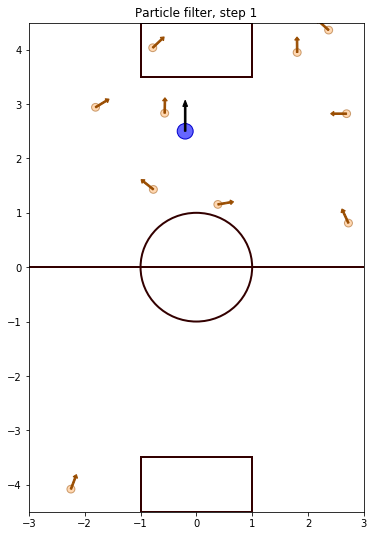

In [412]:
factor = 7
plt.figure("Robot in the world", figsize=(field.w_width, field.w_length))
plt.title('Particle filter, step ' + str(1))
grid = [-field.w_width/2.0, field.w_width/2.0, -field.w_length/2.0, field.w_length/2.0]
ax = plt.axis(grid)
#plt.grid(b=True, which='major', color='0.75', linestyle='--')
#plt.xticks([i for i in range(0, int(6), 5)])
#plt.yticks([i for i in range(0, int(9), 5)])

for el in field.field:
    if el == 'circles':
        for circle in field.field['circles']:
            plot_circle = plt.Circle((circle[0], circle[1]), circle[2],linewidth=2, fill=False, edgecolor='#330000')
            plt.gca().add_patch(plot_circle)
    if el == 'lines' :     
        for line in field.field['lines']:
            plot_line = plt.Line2D(line[0], line[1], linewidth=2, linestyle="-", color='#330000')
            plt.gca().add_line(plot_line)
    if el == 'rectangles' :     
        for rectangle in field.field['rectangles']:
            rect = plt.Rectangle(rectangle[0], rectangle[1], rectangle[2], linewidth=2, linestyle="-", fill = False, edgecolor='#330000')
            plt.gca().add_patch(rect)
    
# draw particles
for ind in range(len(p)):

    # particle
    circle = plt.Circle((p[ind].x, p[ind].y), 1./factor/2, facecolor='#ffb266', edgecolor='#994c00', alpha=0.5)
    plt.gca().add_patch(circle)

    # particle's orientation
    arrow = plt.Arrow(p[ind].x, p[ind].y, 2*np.cos(p[ind].orientation)/factor, 2*np.sin(p[ind].orientation)/factor, width=1/factor, alpha=1., facecolor='#994c00', edgecolor='#994c00')
    plt.gca().add_patch(arrow)

circle = plt.Circle((robot.x, robot.y), 1./factor, facecolor='#6666ff', edgecolor='#0000cc')
plt.gca().add_patch(circle)
 
    # robot's orientation
arrow = plt.Arrow(robot.x, robot.y, 2*np.cos(robot.orientation), 2*np.sin(robot.orientation)/factor/0.5, 1./factor, alpha=1.0, facecolor='#000000', edgecolor='#000000')
plt.gca().add_patch(arrow)
 


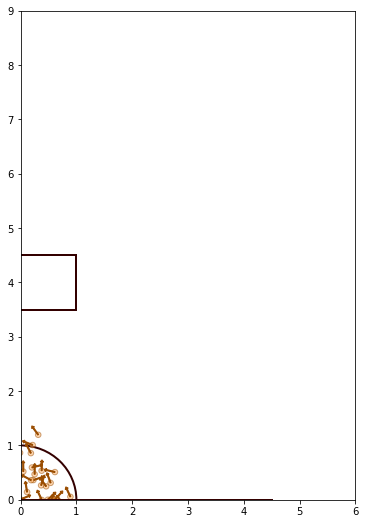

In [364]:
factor = 10
plt.figure("Robot in the world", figsize=(field.w_width, field.w_length))

grid = [0, field.w_width, 0, field.w_length]
ax = plt.axis(grid)
#plt.grid(b=True, which='major', color='0.75', linestyle='--')
#plt.xticks([i for i in range(0, int(6), 5)])
#plt.yticks([i for i in range(0, int(9), 5)])

for el in field.field:
    if el == 'circles':
        for circle in field.field['circles']:
            plot_circle = plt.Circle((circle[0], circle[1]), circle[2],linewidth=2, fill=False, edgecolor='#330000')
            plt.gca().add_patch(plot_circle)
    if el == 'lines' :     
        for line in field.field['lines']:
            plot_line = plt.Line2D(line[0], line[1], linewidth=2, linestyle="-", color='#330000')
            plt.gca().add_line(plot_line)
    if el == 'rectangles' :     
        for rectangle in field.field['rectangles']:
            rect = plt.Rectangle(rectangle[0], rectangle[1], rectangle[2], linewidth=2, linestyle="-", fill = False, edgecolor='#330000')
            plt.gca().add_patch(rect)
    
# draw particles
for ind in range(len(p)):

    # particle
    circle = plt.Circle((p[ind].x, p[ind].y), 1./factor/2, facecolor='#ffb266', edgecolor='#994c00', alpha=0.5)
    plt.gca().add_patch(circle)

    # particle's orientation
    arrow = plt.Arrow(p[ind].x, p[ind].y, 2*np.cos(p[ind].orientation)/factor, 2*np.sin(p[ind].orientation)/factor, width=1/factor, alpha=1., facecolor='#994c00', edgecolor='#994c00')
    plt.gca().add_patch(arrow)



In [155]:
import matplotlib.pylab as plt
def visualization(robot, step, p, pr, weights):

 
    plt.figure("Robot in the world", figsize=(15., 15.))
    plt.title('Particle filter, step ' + str(step))
 
    # draw coordinate grid for plotting
    grid = [0, world_size, 0, world_size]
    plt.axis(grid)
    plt.grid(b=True, which='major', color='0.75', linestyle='--')
    plt.xticks([i for i in range(0, int(world_size), 5)])
    plt.yticks([i for i in range(0, int(world_size), 5)])
 
    # draw particles
    for ind in range(len(p)):
 
        # particle
        circle = plt.Circle((p[ind].x, p[ind].y), 1., facecolor='#ffb266', edgecolor='#994c00', alpha=0.5)
        plt.gca().add_patch(circle)
 
        # particle's orientation
        arrow = plt.Arrow(p[ind].x, p[ind].y, 2*np.cos(p[ind].orientation), 2*np.sin(p[ind].orientation), alpha=1., facecolor='#994c00', edgecolor='#994c00')
        plt.gca().add_patch(arrow)
 
    # draw resampled particles
    for ind in range(len(pr)):
 
        # particle
        circle = plt.Circle((pr[ind].x, pr[ind].y), 1., facecolor='#66ff66', edgecolor='#009900', alpha=0.5)
        plt.gca().add_patch(circle)
 
        # particle's orientation
        arrow = plt.Arrow(pr[ind].x, pr[ind].y, 2*np.cos(pr[ind].orientation), 2*np.sin(pr[ind].orientation), alpha=1., facecolor='#006600', edgecolor='#006600')
        plt.gca().add_patch(arrow)
 
    # fixed landmarks of known locations
    for lm in landmarks:
        circle = plt.Circle((lm[0], lm[1]), 1., facecolor='#cc0000', edgecolor='#330000')
        plt.gca().add_patch(circle)
 
    # robot's location
    circle = plt.Circle((robot.x, robot.y), 1., facecolor='#6666ff', edgecolor='#0000cc')
    plt.gca().add_patch(circle)
 
    # robot's orientation
    arrow = plt.Arrow(robot.x, robot.y, 2*np.cos(robot.orientation), 2*np.sin(robot.orientation), alpha=0.5, facecolor='#000000', edgecolor='#000000')
    plt.gca().add_patch(arrow)
 
    plt.savefig("figure_" + str(step) + ".png")
    plt.close()

In [4]:
k = 0

In [7]:
with open('pf_constants.json', 'w') as constants


SyntaxError: invalid syntax (<ipython-input-7-17d279bf2ded>, line 1)

In [18]:
s = 2.0

In [17]:
k = [1,3,4]

In [22]:
for i in k:
    k[i] /=s

TypeError: list indices must be integers or slices, not float

In [24]:
k = k/s

TypeError: unsupported operand type(s) for /: 'list' and 'float'

In [1]:
kek = {'her':[12,24],'ved':[37,69]}

In [2]:
kek

{'her': [12, 24], 'ved': [37, 69]}

In [3]:
b = kek['her']
kek['her'] = kek['ved']

In [4]:
b

[12, 24]

In [5]:
kek

{'her': [37, 69], 'ved': [37, 69]}

In [9]:
a = kek.keys()

In [10]:
a

dict_keys(['her', 'ved'])

In [11]:
kek.values()

dict_values([[37, 69], [37, 69]])